In [2]:
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

In [3]:
# Load the TECHM customers dataset
customer_data = pd.read_excel("C:\\Users\\Ranjan\\Data_mahindra\\Customer_Data.xlsx")

In [4]:
final_invoice = pd.read_csv("C:\\Users\\Ranjan\\Data_mahindra\\Final_invoice.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
jtd = pd.read_csv("C:\\Users\\Ranjan\\Data_mahindra\\JTD.csv")

In [6]:
customer_data = customer_data.drop(['Business Partner','Marital Status','Occupation','Date of Birth','Death date'], axis=1)

In [7]:
final_invoice = final_invoice.drop(['Unnamed: 0','Amt Rcvd From Custom','Amt Rcvd From Ins Co','CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)','Cash /Cashless Type', 'Claim No.','Expiry Date', 'Gate Pass Date','Gate Pass Time','IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)','Outstanding Amt','Insurance Company','JobCard Date', 'JobCard Time',
       'Misc Total', 'ODN No.', 'OSL Total','Outstanding Amt', 'Parts Total','Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
        'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)','Service Advisor Name','TDS amount', 'Total CGST',
       'Total GST', 'Total IGST', 'Total SGST/UGST','Technician Name','User ID'], axis=1)

In [8]:
jtd = jtd.drop(['Unnamed: 0','Order Item', 'Material','Labor Value Number', 'Description', 'Item Category','Target quantity UoM'], axis=1)

In [9]:
invoice_mah = final_invoice.loc[final_invoice['District'] == 'Maharashtra']

In [10]:
invoice_mah['Customer No.']=invoice_mah['Customer No.'].astype('str')
customer_data['Customer No.']=customer_data['Customer No.'].astype('str')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
customer_join_invoice=customer_data.merge(invoice_mah,on='Customer No.',)

In [12]:
customer_join_invoice['Job Card No']=customer_join_invoice['Job Card No'].astype('str')
jtd['DBM Order']=jtd['DBM Order'].astype('str')

In [13]:
final_join=customer_join_invoice.merge(jtd,left_on='Job Card No',right_on='DBM Order',)

In [14]:
final_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889456 entries, 0 to 889455
Data columns (total 27 columns):
Customer No.          889456 non-null object
Partner Type          883720 non-null float64
Data Origin           880943 non-null object
Gender                889456 non-null object
Unnamed: 9            0 non-null float64
Unnamed: 10           4 non-null object
Area / Locality       796002 non-null object
CITY                  889456 non-null object
Cust Type             889456 non-null object
District              889456 non-null object
Invoice Date          889456 non-null object
Invoice No            889456 non-null int64
Invoice Time          889456 non-null object
Job Card No           889456 non-null object
KMs Reading           889456 non-null int64
Labour Total          889456 non-null float64
Make                  889456 non-null object
Model                 885461 non-null object
Order Type            889456 non-null object
Pin code              889456 non-null int64

In [15]:
print(final_join['Invoice Date'].min(), final_join['Invoice Date'].max())

01-01-2013 31-12-2015


In [16]:
final_join['Invoice DateTime'] = pd.to_datetime(final_join['Invoice Date'])
#final_join['Invoice Date'].astype('timedelta64[D]')

In [17]:
import datetime as dt
sd = dt.datetime(2016,12,12)
final_join['hist']=sd - final_join['Invoice DateTime']
final_join['hist'].astype('timedelta64[D]')
final_join['hist']=final_join['hist'] / np.timedelta64(1, 'D')
final_join.head()

,Customer No.,Partner Type,Data Origin,Gender,Unnamed: 9,Unnamed: 10,Area / Locality,CITY,Cust Type,District,...,Pin code,Total Amt Wtd Tax.,Total Value,Population,census_dist,DBM Order,Order Quantity,Net value,Invoice DateTime,hist
0,1,1.0,Z001,Others,NaN,Others,NaN,PUNE,Retail,Maharashtra,...,411021,0.0,0.0,"28,07,029",Pune,83,0.0,0.00,2012-09-05,1559.0
1,1,1.0,Z001,Others,NaN,Others,NaN,PUNE,Retail,Maharashtra,...,411021,0.0,0.0,"28,07,029",Pune,84,0.0,0.00,2012-09-18,1546.0
2,1,1.0,Z001,Others,NaN,Others,NaN,PUNE,Retail,Maharashtra,...,411021,0.0,0.0,"28,07,029",Pune,7193,0.0,0.00,2012-09-18,1546.0
3,1,1.0,Z001,Others,NaN,Others,NaN,PUNE,Retail,Maharashtra,...,411021,0.0,0.0,"28,07,029",Pune,25779,0.0,0.00,2013-03-30,1353.0
4,2,1.0,Z005,Others,NaN,NaN,NaN,GHATKOPAR,Retail,Maharashtra,...,400075,718.3,718.3,"99,25,891",Mumbai,87,24.0,99.95,2012-05-04,1683.0


In [18]:
rfmTable = final_join.groupby('Customer No.').agg({'hist': lambda x:x.min(), # Recency
                                        'Customer No.': lambda x: len(x),               # Frequency
                                        'Total Amt Wtd Tax.': lambda x: x.sum(),
                                                  'Order Quantity': lambda x: x.sum()})          # Monetary Value

rfmTable.rename(columns={'hist': 'recency', 
                         'Customer No.': 'frequency', 
                         'Total Amt Wtd Tax.': 'monetary_value',
                        'Order Quantity': 'Total quantity'}, inplace=True)

In [19]:
rfmTable.head()

,recency,frequency,monetary_value,Total quantity
Customer No.,,,,
1,1353.0,4,0.00,0.0
10,1274.0,27,76030.57,377.4
100,1464.0,20,185394.20,9967.7
1000,790.0,39,77654.54,300.7
100001,392.0,14,15912.47,1208.2


In [20]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value  Total quantity
0.25    179.0        3.0         1794.77            15.0
0.50    426.0        8.0        18450.19            94.0
0.75    851.0       18.0        83379.12           272.0 <class 'pandas.core.frame.DataFrame'>


In [21]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 179.0, 0.5: 426.0, 0.75: 851.0},
 'frequency': {0.25: 3.0, 0.5: 8.0, 0.75: 18.0},
 'monetary_value': {0.25: 1794.77,
  0.5: 18450.190000000002,
  0.75: 83379.12000000001},
 'Total quantity': {0.25: 15.0, 0.5: 94.0, 0.75: 272.0}}

In [22]:
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1   

In [23]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [24]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [25]:
rfmSeg.head()

,recency,frequency,monetary_value,Total quantity,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer No.,,,,,,,,
1,1353.0,4,0.00,0.0,4,3,4,434
10,1274.0,27,76030.57,377.4,4,1,2,412
100,1464.0,20,185394.20,9967.7,4,1,1,411
1000,790.0,39,77654.54,300.7,3,1,2,312
100001,392.0,14,15912.47,1208.2,2,2,3,223


In [26]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,Total quantity,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer No.,,,,,,,,
118265,134.0,217,37594468.37,536.827,1,1,1,111
31691,44.0,319,31860108.70,639.400,1,1,1,111
222264,104.0,226,27365544.30,63954.500,1,1,1,111
192797,66.0,109,21611573.48,66151.500,1,1,1,111
209689,73.0,135,19305185.55,24489.312,1,1,1,111
183691,135.0,153,19122793.12,3468.600,1,1,1,111
244385,44.0,154,18485132.82,145344.000,1,1,1,111
203179,74.0,186,18413134.68,343.500,1,1,1,111
187176,166.0,48,14981336.16,3420.500,1,1,1,111


In [27]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111    697218.696271
112     53372.203696
113     13714.618947
114         0.000000
121    184890.762927
122     43557.416244
123     11218.524625
124      1168.588421
131    147758.517333
132     35703.654587
133      8560.137457
134       786.218849
141    105390.012000
142     34769.481966
143      5588.745248
144       366.355781
211    732219.063951
212     54930.126735
213     13455.994667
221    184063.619713
222     42108.010680
223     11197.674722
224      1082.637273
231    182989.704746
232     34162.522806
233      9092.102071
234       911.189975
241    102464.562500
242     31601.276780
243      5401.384403
244       353.628700
311    729025.343025
312     53612.485798
313     13991.224138
321    168965.633352
322     43888.947706
323      9921.071677
324       879.793750
331    122857.573846
332     34254.432531
333      8679.200949
334       808.150155
341    119777.610000
342     30283.835783
343      4962.112674
344       480.452557
411    502099.866327
412 

In [28]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60408 entries, 1 to PLX312
Data columns (total 9 columns):
recency           60408 non-null float64
frequency         60408 non-null int64
monetary_value    60408 non-null float64
Total quantity    60408 non-null float64
R_Quartile        60408 non-null int64
F_Quartile        60408 non-null int64
M_Quartile        60408 non-null int64
RFMClass          60408 non-null object
Total Score       60408 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 4.6+ MB
              recency  frequency  monetary_value  Total quantity  R_Quartile  \
Customer No.                                                                   
1              1353.0          4            0.00             0.0           4   
10             1274.0         27        76030.57           377.4           4   
100            1464.0         20       185394.20          9967.7           4   
1000            790.0         39        77654.54           300.7           3

In [29]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     697218.696271
4     526133.073664
5     406272.787647
6     203032.462781
7      44426.956687
8      22323.260246
9       7374.186167
10      4028.204616
11      1418.506196
12       514.497671
Name: monetary_value, dtype: float64

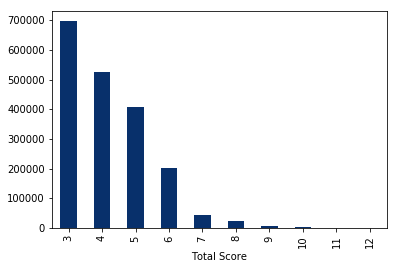

In [30]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

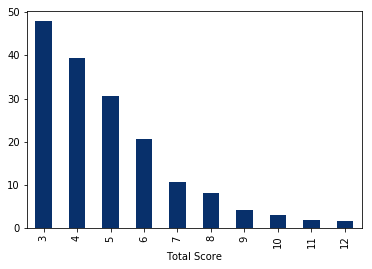

In [31]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

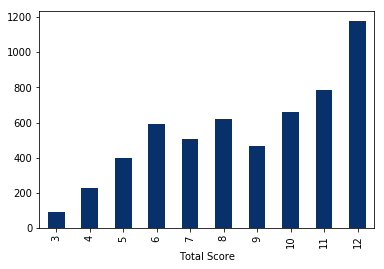

In [32]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

In [33]:
rfmSeg.columns

Index(['recency', 'frequency', 'monetary_value', 'Total quantity',
       'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFMClass', 'Total Score'],
      dtype='object')

In [34]:
final_invoice.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'KMs Reading', 'Labour Total', 'Make', 'Model', 'Order Type',
       'Pin code', 'Total Amt Wtd Tax.', 'Total Value', ' Population ',
       'census_dist'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler
features = list(rfmSeg.columns)
# Separating out the features
x = rfmSeg.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [37]:
principalDf.head()

,principal component 1,principal component 2
0,-3.017960,1.194787
1,-0.402024,2.702769
2,0.791282,3.856331
3,0.889708,1.554719
4,0.598681,-0.525477


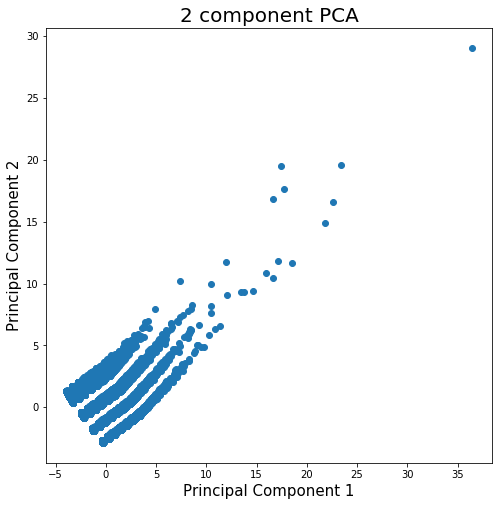

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])

In [39]:
import pandas as pd, numpy as np
from sklearn.cluster import KMeans

In [40]:
km = KMeans(init="random", n_clusters=4)
km.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
km.labels_

array([2, 3, 3, ..., 0, 1, 1])

In [42]:
principalDf['clusters']=km.labels_

In [43]:
principalDf.head()

,principal component 1,principal component 2,clusters
0,-3.017960,1.194787,2
1,-0.402024,2.702769,3
2,0.791282,3.856331,3
3,0.889708,1.554719,3
4,0.598681,-0.525477,1


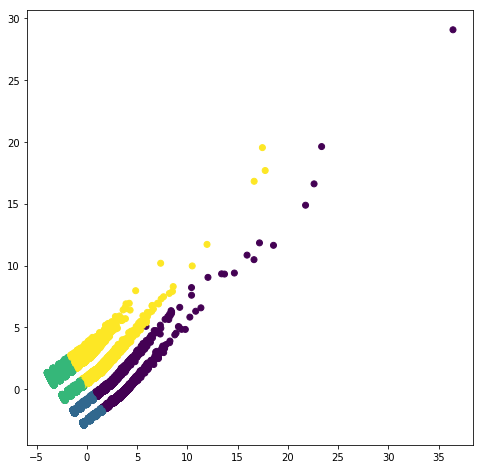

In [44]:
import matplotlib.pyplot as plt
colors = ['red','green','blue','purple']
fig = plt.figure(figsize=(8,8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['clusters'])


In [45]:
rfmSeg['Average Basket Value'] = rfmSeg['monetary_value']/rfmSeg['frequency']
rfmSeg['Average Basket size'] = rfmSeg['Total quantity']/rfmSeg['frequency']

In [46]:
rfmSeg.head()

,recency,frequency,monetary_value,Total quantity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Average Basket Value,Average Basket size
Customer No.,,,,,,,,,,,
1,1353.0,4,0.00,0.0,4,3,4,434,11,0.000000,0.000000
10,1274.0,27,76030.57,377.4,4,1,2,412,7,2815.947037,13.977778
100,1464.0,20,185394.20,9967.7,4,1,1,411,6,9269.710000,498.385000
1000,790.0,39,77654.54,300.7,3,1,2,312,6,1991.142051,7.710256
100001,392.0,14,15912.47,1208.2,2,2,3,223,7,1136.605000,86.300000


In [47]:
final_join.head()

,Customer No.,Partner Type,Data Origin,Gender,Unnamed: 9,Unnamed: 10,Area / Locality,CITY,Cust Type,District,...,Pin code,Total Amt Wtd Tax.,Total Value,Population,census_dist,DBM Order,Order Quantity,Net value,Invoice DateTime,hist
0,1,1.0,Z001,Others,NaN,Others,NaN,PUNE,Retail,Maharashtra,...,411021,0.0,0.0,"28,07,029",Pune,83,0.0,0.00,2012-09-05,1559.0
1,1,1.0,Z001,Others,NaN,Others,NaN,PUNE,Retail,Maharashtra,...,411021,0.0,0.0,"28,07,029",Pune,84,0.0,0.00,2012-09-18,1546.0
2,1,1.0,Z001,Others,NaN,Others,NaN,PUNE,Retail,Maharashtra,...,411021,0.0,0.0,"28,07,029",Pune,7193,0.0,0.00,2012-09-18,1546.0
3,1,1.0,Z001,Others,NaN,Others,NaN,PUNE,Retail,Maharashtra,...,411021,0.0,0.0,"28,07,029",Pune,25779,0.0,0.00,2013-03-30,1353.0
4,2,1.0,Z005,Others,NaN,NaN,NaN,GHATKOPAR,Retail,Maharashtra,...,400075,718.3,718.3,"99,25,891",Mumbai,87,24.0,99.95,2012-05-04,1683.0


In [48]:
final_join.columns

Index(['Customer No.', 'Partner Type', 'Data Origin', 'Gender', 'Unnamed: 9',
       'Unnamed: 10', 'Area / Locality', 'CITY', 'Cust Type', 'District',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'KMs Reading', 'Labour Total', 'Make', 'Model', 'Order Type',
       'Pin code', 'Total Amt Wtd Tax.', 'Total Value', ' Population ',
       'census_dist', 'DBM Order', 'Order Quantity', 'Net value',
       'Invoice DateTime', 'hist'],
      dtype='object')

In [49]:
final_join = final_join.drop(['Partner Type', 'Data Origin','Unnamed: 9',
       'Unnamed: 10', 'Area / Locality', 'CITY', 'District',
       'Invoice Date','Invoice No', 'Invoice Time', 'Job Card No','Model',
        'Total Amt Wtd Tax.','DBM Order','Net value', 'Invoice DateTime', 'hist'], axis=1)

In [50]:
merged = pd.merge(final_join, rfmSeg, left_on = 'Customer No.', right_index=True)

In [51]:
merged.head()

,Customer No.,Gender,Cust Type,KMs Reading,Labour Total,Make,Order Type,Pin code,Total Value,Population,...,frequency,monetary_value,Total quantity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Average Basket Value,Average Basket size
0,1,Others,Retail,1212,0.00,MARUTI SUZUKI,Paid Service,411021,0.0,"28,07,029",...,4,0.0,0.0,4,3,4,434,11,0.000000,0.000
1,1,Others,Retail,10,0.00,MARUTI SUZUKI,Paid Service,411021,0.0,"28,07,029",...,4,0.0,0.0,4,3,4,434,11,0.000000,0.000
2,1,Others,Retail,35817,0.00,MARUTI SUZUKI,Paid Service,411021,0.0,"28,07,029",...,4,0.0,0.0,4,3,4,434,11,0.000000,0.000
3,1,Others,Retail,39975,0.00,MARUTI SUZUKI,Running Repairs,411021,0.0,"28,07,029",...,4,0.0,0.0,4,3,4,434,11,0.000000,0.000
4,2,Others,Retail,133165,99.95,TATA MOTORS,Running Repairs,400075,718.3,"99,25,891",...,12,51317.9,319.5,4,2,2,422,8,4276.491667,26.625


In [55]:
merged.to_csv('merged.csv')

In [69]:
merged_df = pd.get_dummies(data=merged, columns=['Gender', 'Cust Type','Make','census_dist','Order Type'])

In [70]:
merged_df.head()

,Customer No.,KMs Reading,Labour Total,Pin code,Total Value,Population,Order Quantity,recency,frequency,monetary_value,...,census_dist_Yavatmal,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Repeat Order,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,Order Type_Workshop Damage
0,1,1212,0.00,411021,0.0,"28,07,029",0.0,1353.0,4,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1,10,0.00,411021,0.0,"28,07,029",0.0,1353.0,4,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1,35817,0.00,411021,0.0,"28,07,029",0.0,1353.0,4,0.0,...,0,0,0,1,0,0,0,0,0,0
3,1,39975,0.00,411021,0.0,"28,07,029",0.0,1353.0,4,0.0,...,0,0,0,0,0,1,0,0,0,0
4,2,133165,99.95,400075,718.3,"99,25,891",24.0,1683.0,12,51317.9,...,0,0,0,0,0,1,0,0,0,0


In [71]:
cluster_df = merged_df.drop(['Customer No.',], axis=1)

In [72]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889456 entries, 0 to 889455
Data columns (total 85 columns):
KMs Reading                     889456 non-null int64
Labour Total                    889456 non-null float64
Pin code                        889456 non-null int64
Total Value                     666147 non-null float64
 Population                     889456 non-null object
Order Quantity                  889456 non-null float64
recency                         889456 non-null float64
frequency                       889456 non-null int64
monetary_value                  889456 non-null float64
Total quantity                  889456 non-null float64
R_Quartile                      889456 non-null int64
F_Quartile                      889456 non-null int64
M_Quartile                      889456 non-null int64
RFMClass                        889456 non-null object
Total Score                     889456 non-null int64
Average Basket Value            889456 non-null float64
Average B

In [73]:
cluster_df = merged_df.drop([' Population ','RFMClass'], axis=1)

In [74]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889456 entries, 0 to 889455
Data columns (total 84 columns):
Customer No.                    889456 non-null object
KMs Reading                     889456 non-null int64
Labour Total                    889456 non-null float64
Pin code                        889456 non-null int64
Total Value                     666147 non-null float64
Order Quantity                  889456 non-null float64
recency                         889456 non-null float64
frequency                       889456 non-null int64
monetary_value                  889456 non-null float64
Total quantity                  889456 non-null float64
R_Quartile                      889456 non-null int64
F_Quartile                      889456 non-null int64
M_Quartile                      889456 non-null int64
Total Score                     889456 non-null int64
Average Basket Value            889456 non-null float64
Average Basket size             889456 non-null float64
Gender_F

In [77]:
cluster_df = cluster_df.drop(['Customer No.'], axis=1)


In [78]:
from sklearn.preprocessing import StandardScaler
features = list(cluster_df.columns)
# Separating out the features
x = cluster_df.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

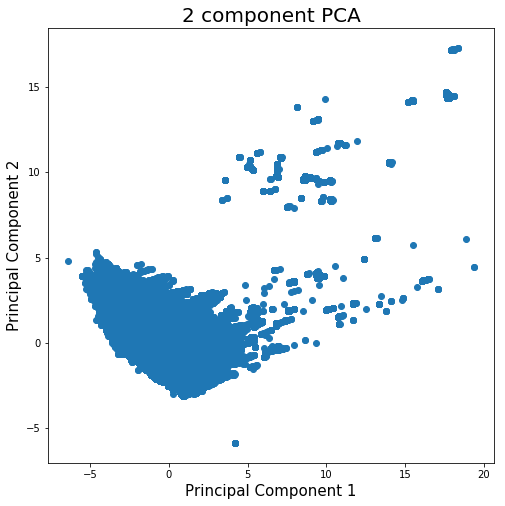

In [97]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(cluster_df)
X_embedded.shape

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-bc39c1a4061a>", line 2, in <module>
    X_embedded = TSNE(n_components=2).fit_transform(cluster_df)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 858, in fit_transform
    embedding = self._fit(X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 770, in _fit
    skip_num_points=skip_num_points)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 812, in _tsne
    **opt_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 340, in _gradient_descent
    grad_norm = linalg.norm(grad)
  File "C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\misc.py", line 137, in norm
    a = np.asarray_chkfinite(a)
  File "C:\ProgramData\A

In [106]:
X_embedded[:,0]

array([-23.685442, -23.697233, -14.826852, ..., 107.94969 , 108.46481 ,
       108.41995 ], dtype=float32)

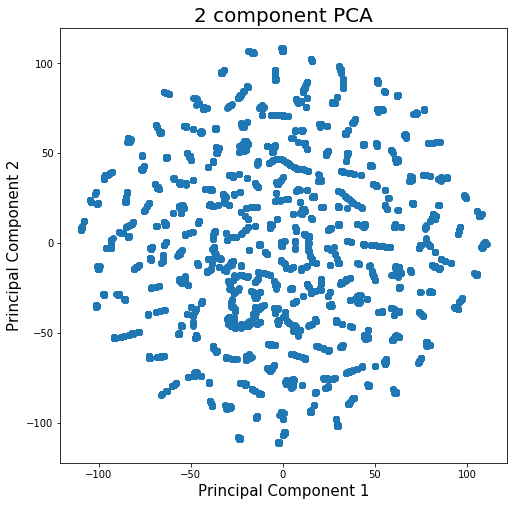

In [107]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_embedded[:,0]
               , X_embedded[:,1])

In [110]:
year_df = cluster_df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(sns.heatmap(year_df.corr(), ax=ax)

SyntaxError: unexpected EOF while parsing (<ipython-input-110-6b3d85aa3ea0>, line 3)

In [79]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [80]:
merged.head()

,Customer No.,Gender,Cust Type,KMs Reading,Labour Total,Make,Order Type,Pin code,Total Value,Population,...,frequency,monetary_value,Total quantity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Average Basket Value,Average Basket size
0,1,Others,Retail,1212,0.00,MARUTI SUZUKI,Paid Service,411021,0.0,"28,07,029",...,4,0.0,0.0,4,3,4,434,11,0.000000,0.000
1,1,Others,Retail,10,0.00,MARUTI SUZUKI,Paid Service,411021,0.0,"28,07,029",...,4,0.0,0.0,4,3,4,434,11,0.000000,0.000
2,1,Others,Retail,35817,0.00,MARUTI SUZUKI,Paid Service,411021,0.0,"28,07,029",...,4,0.0,0.0,4,3,4,434,11,0.000000,0.000
3,1,Others,Retail,39975,0.00,MARUTI SUZUKI,Running Repairs,411021,0.0,"28,07,029",...,4,0.0,0.0,4,3,4,434,11,0.000000,0.000
4,2,Others,Retail,133165,99.95,TATA MOTORS,Running Repairs,400075,718.3,"99,25,891",...,12,51317.9,319.5,4,2,2,422,8,4276.491667,26.625


In [81]:
eda_data = merged.loc[merged['RFMClass'] == '444']

In [82]:
eda_data1 = merged.loc[merged['RFMClass'] == '111']
eda_data2 = merged.loc[merged['RFMClass'] == '222']
eda_data3 = merged.loc[merged['RFMClass'] == '333']


In [83]:
#sns.factorplot("Gender", data=eda_data[(eda_data['Area'] == "India") | (df['Area'] == "China, mainland") | (df['Area'] == "United States of America")], kind="count", hue="Element", size=8, aspect=.8)

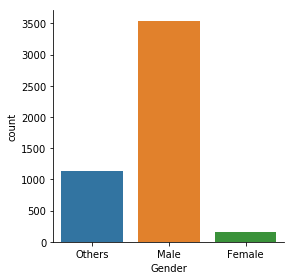

In [84]:
#sns.factorplot("Gender", data=merged[(merged['RFMClass'] == '444')], kind="count", hue="Element", size=8, aspect=.8)
sns.factorplot("Gender", data=eda_data, kind="count")
plt.show()

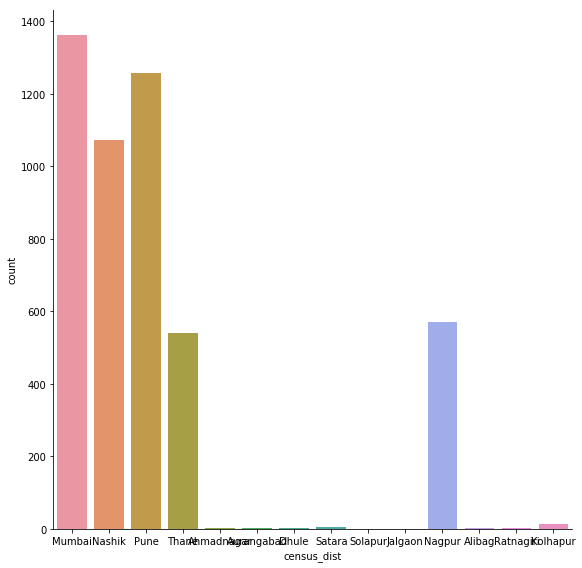

In [85]:
sns.factorplot("census_dist", data=eda_data, kind="count",size=8)
plt.show()

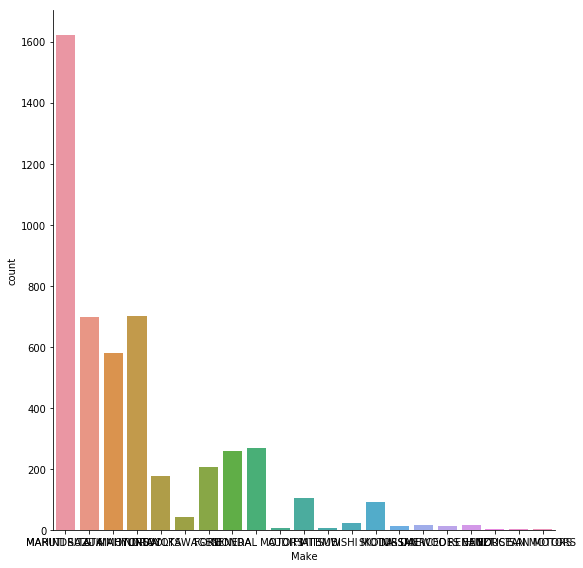

In [86]:
sns.factorplot("Make", data=eda_data, kind="count",size=8)
plt.show()

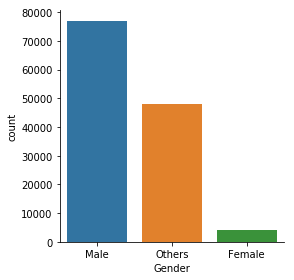

In [87]:
sns.factorplot("Gender", data=eda_data1, kind="count")
plt.show()

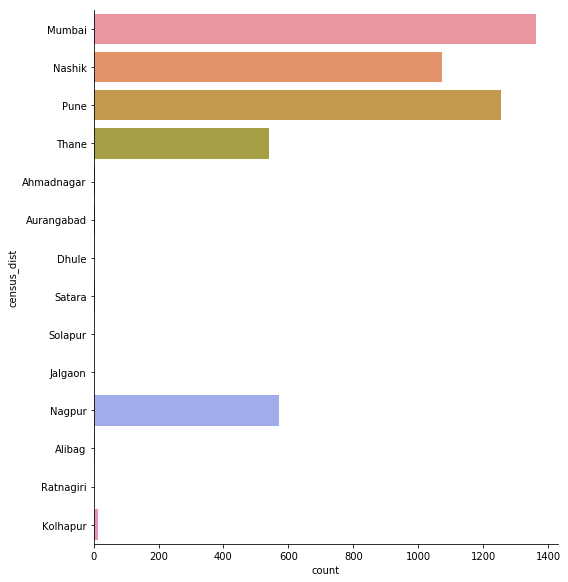

In [104]:
sns.factorplot(y= "census_dist", data=eda_data, kind="count",size=8)
plt.show()

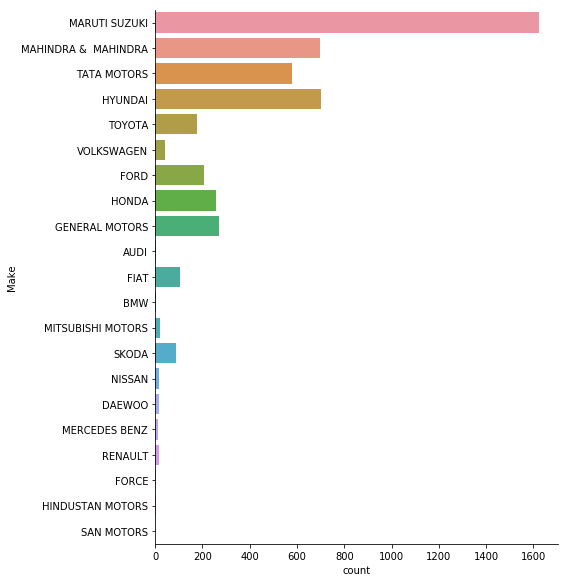

In [105]:
sns.factorplot(y= "Make", data=eda_data, kind="count",size=8)
plt.show()

In [89]:
rfmSeg.head()

,recency,frequency,monetary_value,Total quantity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Average Basket Value,Average Basket size
Customer No.,,,,,,,,,,,
1,1353.0,4,0.00,0.0,4,3,4,434,11,0.000000,0.000000
10,1274.0,27,76030.57,377.4,4,1,2,412,7,2815.947037,13.977778
100,1464.0,20,185394.20,9967.7,4,1,1,411,6,9269.710000,498.385000
1000,790.0,39,77654.54,300.7,3,1,2,312,6,1991.142051,7.710256
100001,392.0,14,15912.47,1208.2,2,2,3,223,7,1136.605000,86.300000


In [90]:
from sklearn.preprocessing import StandardScaler
features = list(rfmSeg.columns)
# Separating out the features
x = rfmSeg.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

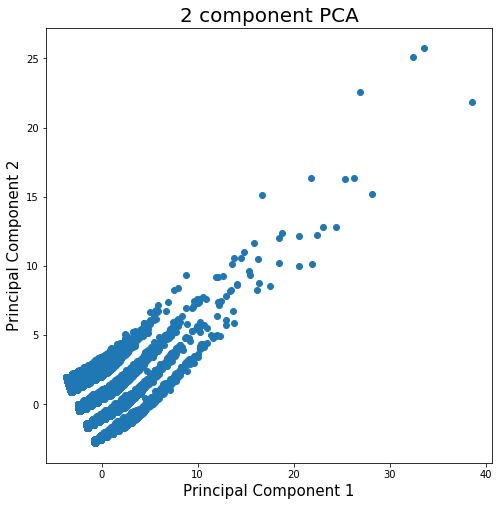

In [92]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])

In [93]:
import pandas as pd, numpy as np
from sklearn.cluster import KMeans

In [94]:
km = KMeans(init="random", n_clusters=4)
km.fit(rfmSeg)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
rfmSeg['clusters']=km.labels_

In [96]:
rfmSeg.head()

,recency,frequency,monetary_value,Total quantity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Average Basket Value,Average Basket size,clusters
Customer No.,,,,,,,,,,,,
1,1353.0,4,0.00,0.0,4,3,4,434,11,0.000000,0.000000,3
10,1274.0,27,76030.57,377.4,4,1,2,412,7,2815.947037,13.977778,3
100,1464.0,20,185394.20,9967.7,4,1,1,411,6,9269.710000,498.385000,3
1000,790.0,39,77654.54,300.7,3,1,2,312,6,1991.142051,7.710256,3
100001,392.0,14,15912.47,1208.2,2,2,3,223,7,1136.605000,86.300000,3


In [97]:
pd.pivot_table(rfmSeg,index=["clusters"])

,Average Basket Value,Average Basket size,F_Quartile,M_Quartile,R_Quartile,Total Score,Total quantity,frequency,monetary_value,recency
clusters,,,,,,,,,,
0,34688.431217,49.876166,1.014627,1.000000,2.422633,4.437259,2749.456359,76.354119,2.016906e+06,491.005389
1,88267.433575,54.257576,1.000000,1.000000,2.242857,4.242857,5319.999100,145.357143,8.818822e+06,442.392857
2,179092.161963,110.377123,1.000000,1.000000,2.200000,4.200000,14968.759733,193.933333,2.765671e+07,397.233333
3,3771.786314,41.021223,2.623950,2.537386,2.500568,7.661905,353.701258,12.964319,7.696520e+04,550.194133


In [98]:
dff = pd.merge(merged, rfmSeg[['clusters']], left_on = 'Customer No.', right_index=True)

In [99]:
dff

,Customer No.,Gender,Cust Type,KMs Reading,Labour Total,Make,Order Type,Pin code,Total Value,Population,...,monetary_value,Total quantity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Average Basket Value,Average Basket size,clusters
0,1,Others,Retail,1212,0.00,MARUTI SUZUKI,Paid Service,411021,0.00,"28,07,029",...,0.00,0.000,4,3,4,434,11,0.000000,0.000000,3
1,1,Others,Retail,10,0.00,MARUTI SUZUKI,Paid Service,411021,0.00,"28,07,029",...,0.00,0.000,4,3,4,434,11,0.000000,0.000000,3
2,1,Others,Retail,35817,0.00,MARUTI SUZUKI,Paid Service,411021,0.00,"28,07,029",...,0.00,0.000,4,3,4,434,11,0.000000,0.000000,3
3,1,Others,Retail,39975,0.00,MARUTI SUZUKI,Running Repairs,411021,0.00,"28,07,029",...,0.00,0.000,4,3,4,434,11,0.000000,0.000000,3
4,2,Others,Retail,133165,99.95,TATA MOTORS,Running Repairs,400075,718.30,"99,25,891",...,51317.90,319.500,4,2,2,422,8,4276.491667,26.625000,3
5,2,Others,Retail,133165,99.95,TATA MOTORS,Running Repairs,400075,718.30,"99,25,891",...,51317.90,319.500,4,2,2,422,8,4276.491667,26.625000,3
6,2,Others,Retail,134304,1176.01,TATA MOTORS,Running Repairs,400075,4988.13,"99,25,891",...,51317.90,319.500,4,2,2,422,8,4276.491667,26.625000,3
7,2,Others,Retail,134304,1176.01,TATA MOTORS,Running Repairs,400075,4988.13,"99,25,891",...,51317.90,319.500,4,2,2,422,8,4276.491667,26.625000,3
8,2,Others,Retail,134304,1176.01,TATA MOTORS,Running Repairs,400075,4988.13,"99,25,891",...,51317.90,319.500,4,2,2,422,8,4276.491667,26.625000,3
9,2,Others,Retail,134304,1176.01,TATA MOTORS,Running Repairs,400075,4988.13,"99,25,891",...,51317.90,319.500,4,2,2,422,8,4276.491667,26.625000,3


In [100]:
pd.pivot_table(dff,index=["clusters"])

,Average Basket Value,Average Basket size,F_Quartile,KMs Reading,Labour Total,M_Quartile,Order Quantity,Pin code,R_Quartile,Total Score,Total Value,Total quantity,frequency,monetary_value,recency
clusters,,,,,,,,,,,,,,,
0,26415.155576,36.009274,1.002702,107725.139902,5118.917527,1.000000,36.009274,413146.893390,2.355834,4.358536,24171.320264,2913.822487,107.793293,2.136743e+06,459.837161
1,60670.025509,36.599502,1.000000,115027.177690,8629.587752,1.000000,36.599502,413524.823538,1.971892,3.971892,58179.354490,7916.024745,445.941818,9.704948e+06,357.927518
2,142609.354438,77.185079,1.000000,77948.200241,15808.976201,1.000000,77.185079,406250.012375,2.160021,4.160021,144543.563633,14537.455191,366.891372,2.884873e+07,394.757477
3,5936.694631,27.282672,1.568862,76470.614267,1699.711636,1.597847,27.282672,412648.674178,2.484806,5.651515,5822.632104,713.843631,33.422126,2.187085e+05,532.758780


In [101]:
dff.columns

Index(['Customer No.', 'Gender', 'Cust Type', 'KMs Reading', 'Labour Total',
       'Make', 'Order Type', 'Pin code', 'Total Value', ' Population ',
       'census_dist', 'Order Quantity', 'recency', 'frequency',
       'monetary_value', 'Total quantity', 'R_Quartile', 'F_Quartile',
       'M_Quartile', 'RFMClass', 'Total Score', 'Average Basket Value',
       'Average Basket size', 'clusters'],
      dtype='object')

In [102]:
dff.to_csv('Clusters data.csv')